In [151]:
import numpy as np # includes lots of useful maths funcitons
import matplotlib.pyplot as plt # package for plotting
import scipy.integrate as integrate # package for numerical integration
from scipy.special import gamma, factorial # gamma function and factorial
from scipy.stats import levy_stable

 # PART 1
 Choose two reasonably separated values of the tail index, say alpha_1 = 1.3, and alpha_2 = 1.7. Let X1 be the symmetric stable Paretian random variable (with location zero and scale 1) with alpha1; and X2 be the same, for alpha2; and these are *independent*. For a smart range of x-values (e.g., -8 to 8; but you check the plots and choose), compute:

In [155]:
alpha_1 = 1.3
alpha_2 = 1.9

In [158]:
def cf_symmetric_stable_paretian(t, alpha):
    return np.exp(-abs(t) ** alpha)

### a) using the integral convolution formula (and a program to compute the pdf of the stable), the density of the convolution of X1 and X2, i.e., of S=X1+X2.

We use built in levy stable function

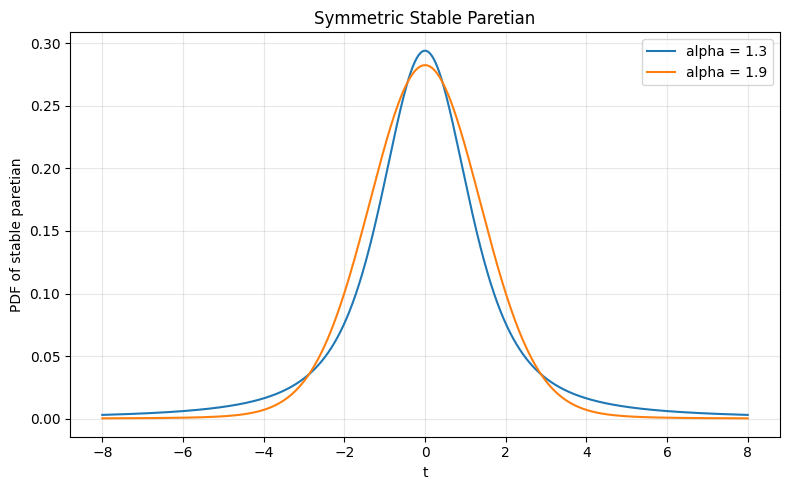

In [160]:
x0 = 8  

# grid for t
t = np.linspace(-x0, 8, 2000)

# compute cfs
phi_1 = levy_stable.pdf(t, alpha_1, 0)
phi_2 = levy_stable.pdf(t, alpha_2, 0)


# plot
plt.figure(figsize=(8, 5))
plt.plot(t, phi_1, label=f'alpha = {alpha_1}')
plt.plot(t, phi_2, label=f'alpha = {alpha_2}')
plt.xlabel('t')
plt.ylabel('PDF of stable paretian')
plt.title('Symmetric Stable Paretian')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [107]:
# def symstab_pdf_scalar(x, alpha):
#     # Compute T
#     T = int(round(1 + 15 * abs(x)))
    
#     kvec = np.arange(0, T + 1)
#     sgn = (-1)**kvec
#     fac = factorial(2 * kvec)
#     gamvals = gamma((2 * kvec + 1) / alpha)

#     coef = sgn / fac * gamvals
#     tail_term = alpha * np.sin(np.pi * alpha / 2) * gamma(alpha) / np.pi
    
#     if abs(x) > 5:
#         return tail_term * abs(x)**(-(1 + alpha))
#     else:
#         xx = x**(2 * kvec)
#         return np.sum(coef * xx) / (np.pi * alpha)
    
    
# def symstab_pdf_vector(xvec, alpha):
#     xvec = np.asarray(xvec)
#     return np.array([symstab_pdf_scalar(x, alpha) for x in xvec])

### Graph density of S = X1 + X2

In [161]:
def integrand(x1, s, alpha1, alpha2):
    return levy_stable.pdf(x1, alpha1, 0) * levy_stable.pdf(s - x1, alpha2, 0)


In [162]:
def convolution_pdf(s, alpha_1, alpha_2, integration_cutoff = np.inf):
    return integrate.quad(integrand, -integration_cutoff, integration_cutoff, args=(s, alpha_1, alpha_2))

In [163]:
# ---- vectorize it ----
conv_pdf_vec = np.vectorize(lambda s: convolution_pdf(s, alpha_1, alpha_2)[0])

# Example usage
t = np.linspace(-8, 8, 100)
y = conv_pdf_vec(t)

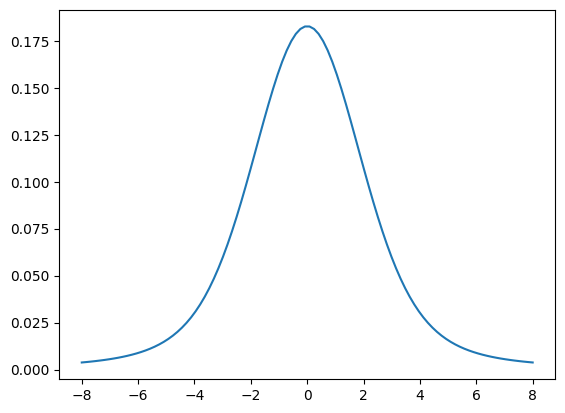

In [164]:
plt.plot(t,y)

# Part b)

In [119]:
symstab_cdf(1.7, 0)
# We lose a small amount of mass due to jump at approximation (x = 5)

C:\Users\macie\AppData\Local\Temp\ipykernel_28392\564074480.py:10: RuntimeWarning: invalid value encountered in multiply
  coef = sgn / fac * gamvals


(0.49785227718994124, 8.141181062626401e-10)

In [132]:
import numpy as np

def stab_gen(nobs, a, b=0, c=1, d=0):
    V = np.random.uniform(-np.pi/2, np.pi/2, size=nobs)
    W = np.random.exponential(1, size=nobs)
    
    if a == 1:
        # Special case: alpha = 1
        term1 = (np.pi/2 + b*V) * np.tan(V)
        term2 = b * np.log((W * np.cos(V)) / (np.pi/2 + b*V))
        x = (2/np.pi) * (term1 - term2)
    else:
        # General case: alpha != 1
        beta = b
        alpha = a
        Cab = np.arctan(beta * np.tan(np.pi*alpha/2)) / alpha
        Sab = (1 + (beta * np.tan(np.pi*alpha/2))**2)**(1/(2*alpha))
        
        A = np.sin(alpha * (V + Cab)) / (np.cos(V)**(1/alpha))
        B0 = np.cos(V - alpha * (V + Cab)) / W
        B = (np.abs(B0))**((1 - alpha)/alpha)
        x = Sab * A * B * np.sign(B0)
    
    # Apply scale and location
    x = c*x + d
    return x


In [135]:
sample = stab_gen(20000, 1.9)

(array([2.52707722e-05, 2.52707722e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.52707722e-05, 0.00000000e+00, 2.52707722e-05, 5.05415444e-05,
        0.00000000e+00, 5.05415444e-05, 7.58123166e-05, 1.01083089e-04,
        4.54873900e-04, 1.97112023e-03, 2.73935171e-02, 1.83162557e-01,
        2.31252836e-01, 5.57725942e-02, 3.99278201e-03, 5.55956988e-04,
        2.02166178e-04, 1.26353861e-04, 2.52707722e-05, 2.52707722e-05,
        2.52707722e-05, 0.00000000e+00, 2.52707722e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

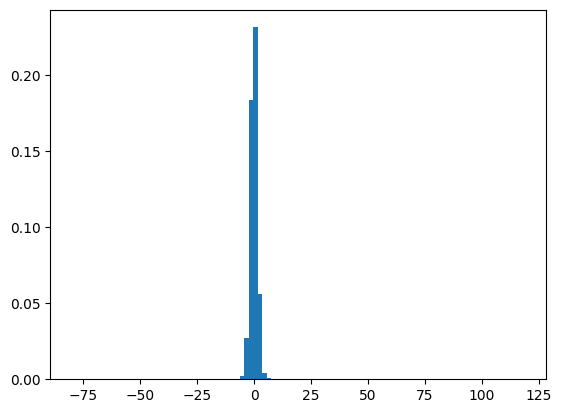

In [136]:
plt.hist(sample, bins=100, density = True)

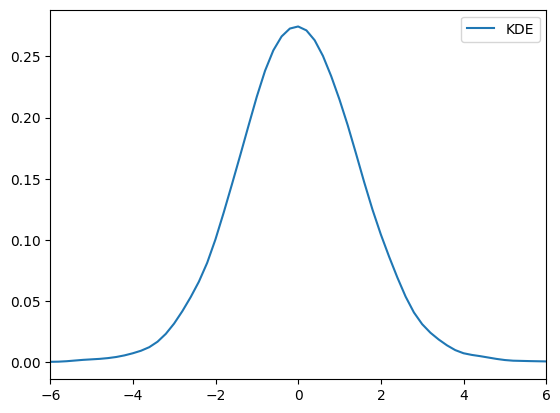

In [140]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# 1. Fit KDE
kde = gaussian_kde(sample)

# 2. Evaluate on a grid
x_grid = np.linspace(sample.min() - 1, sample.max() + 1, 1000)
kde_vals = kde(x_grid)

# 3. Plot
plt.plot(x_grid, kde_vals, label='KDE')
#plt.hist(sample, bins=30, density=True, alpha=0.5, label='Histogram')
plt.xlim(right=6)  # adjust the right leaving left unchanged
plt.xlim(left=-6) 
plt.legend()
plt.show()


# Part c

c) As X1 and X2 are independent, the characteristic function of the sum, S=X1+X2, is trivial. Use the inversion formula applied to the ch.f. of S to compute its density.

In [142]:
def cf_s(t, alpha1, alpha2):
    cf_symmetric_stable_paretian(t, alpha1) * cf_symmetric_stable_paretian(t, alpha2)

In [ ]:
def f(t):
    return np.exp(-np.i *t*x) * cf_s(s,alpha1, alpha2)

In [149]:
def pdf_inversion_cf(s, alpha1, alpha2):
    f = lambda t: np.exp(-np.imag *t*x) * cf_s(s,alpha1, alpha2)
    1/ 2 *np.pi* integrate.quad(f, -np.inf, np.inf)

In [ ]:
pdf_inversion_cf

In [150]:
x0 = 8  

# grid for t
t = np.linspace(-x0, x0, 2000)

# compute cfs
phi_1 = [pdf_inversion_cf(t1, alpha_1, alpha_2) for t1 in t]
#phi_2 = [pdf_inversion_cf(t1, alpha_2) for t1 in t]

# plot
plt.figure(figsize=(8, 5))
plt.plot(t, phi_1, label=f'alpha = {alpha_1}')
plt.plot(t, phi_2, label=f'alpha = {alpha_2}')
plt.xlabel('t')
plt.ylabel('pdf')
plt.title('pdf')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


TypeError: bad operand type for unary -: 'function'

In [17]:
range_s = np.linspace(-6,6,200) 

In [18]:
convo_pdf = []
for i in range_s:
    convo_pdf.append(convolution_pdf(i, alpha_1, alpha_2))
    
#plt.plot(convo_pdf, range_s)

C:\Users\macie\AppData\Local\Temp\ipykernel_28392\651248668.py:10: RuntimeWarning: invalid value encountered in multiply
  coef = sgn / fac * gam


KeyboardInterrupt: 

In [15]:
plt.plot(convo_pdf, range_s)

NameError: name 'convo_pdf' is not defined

In [11]:
symstab_using_sum(0, alpha_1)

0.2853884570401298

In [12]:
symstab_using_sum(0, alpha_2)

0.28306875859161895

In [13]:
integrand(0, 0, alpha_1, alpha_2)

0.08078455625072711